In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet #l1 penalty: 0.5, l2 penalty: 3

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, SimpleRNN, GRU
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
df = pd.read_csv('01_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10960 entries, 0 to 10959
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRGT_YN                  10960 non-null  object 
 1   PRDC_PMON_EMON_BLNC      10960 non-null  int64  
 2   PRDC_SLNG_ACCUM_AMT      10960 non-null  int64  
 3   PRDC_DPS_ACKN_ACCUM_AMT  10960 non-null  int64  
 4   PRDC_ETERM_BLNC          10878 non-null  float64
 5   TXAM_PMON_EMON_BLNC      10960 non-null  int64  
 6   TXAM_SLNG_ACCUM_AMT      10960 non-null  int64  
 7   TXAM_DPS_ACKN_ACCUM_AMT  10960 non-null  int64  
 8   TXAM_ETERM_BLNC          10960 non-null  int64  
 9   TMON_FEE_DCID_AMT        10960 non-null  int64  
 10  PMON_FEE_DCID_AMT        10815 non-null  float64
 11  TMON_OFW_AMT             10960 non-null  int64  
 12  ETERM_INV_QNTY           10960 non-null  int64  
 13  ACCUM_SBSCR_NUM          10960 non-null  int64  
 14  PRDC_SALE_3M_AVG_CASCN

In [ ]:
class2idx = {'Y':1, 'N':0}
idx2class = {0:'N', 1:'Y'}

df['TRGT_YN'] = df['TRGT_YN'].map(class2idx)
df.tail(5)

,TRGT_YN,PRDC_PMON_EMON_BLNC,PRDC_SLNG_ACCUM_AMT,PRDC_DPS_ACKN_ACCUM_AMT,PRDC_ETERM_BLNC,TXAM_PMON_EMON_BLNC,TXAM_SLNG_ACCUM_AMT,TXAM_DPS_ACKN_ACCUM_AMT,TXAM_ETERM_BLNC,TMON_FEE_DCID_AMT,PMON_FEE_DCID_AMT,TMON_OFW_AMT,ETERM_INV_QNTY,ACCUM_SBSCR_NUM,PRDC_SALE_3M_AVG_CASCNT,PRDC_TMON_NSTTL_AMT,TXAM_NATMP_AMT,PRDC_BEF_NSTTL_AMT
10955,1,12169476,38509390,29180356,21498510.0,-360716,197980,0,-162736,41600312,56786799.0,27646300,20,8024,56.0,0,-1082148,0
10956,1,253318070,114046800,126827486,240537384.0,-1473283,4660170,4700000,-1513113,172010797,205539229.0,153264100,316,15914,658.0,83759884,-3694079,0
10957,1,67130569,63062500,51995717,78197352.0,-1722872,4186610,4200000,-1736262,69494496,67891363.0,84265500,415,4716,92.0,0,-5631096,0
10958,0,660551494,0,0,660551494.0,105069120,0,0,105069120,0,0.0,0,11,32,NaN,660551494,315207360,1981654482
10959,0,68323085,0,0,68323085.0,0,0,0,0,0,0.0,0,1,13,NaN,68323085,0,204969255


In [ ]:
df.isnull().sum()

TRGT_YN                       0
PRDC_PMON_EMON_BLNC           0
PRDC_SLNG_ACCUM_AMT           0
PRDC_DPS_ACKN_ACCUM_AMT       0
PRDC_ETERM_BLNC              82
TXAM_PMON_EMON_BLNC           0
TXAM_SLNG_ACCUM_AMT           0
TXAM_DPS_ACKN_ACCUM_AMT       0
TXAM_ETERM_BLNC               0
TMON_FEE_DCID_AMT             0
PMON_FEE_DCID_AMT           145
TMON_OFW_AMT                  0
ETERM_INV_QNTY                0
ACCUM_SBSCR_NUM               0
PRDC_SALE_3M_AVG_CASCNT    3823
PRDC_TMON_NSTTL_AMT           0
TXAM_NATMP_AMT                0
PRDC_BEF_NSTTL_AMT            0
dtype: int64

In [ ]:
df = df.fillna(method='pad')

In [ ]:
df = df.dropna(axis=0)
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

TRGT_YN                    0
PRDC_PMON_EMON_BLNC        0
PRDC_SLNG_ACCUM_AMT        0
PRDC_DPS_ACKN_ACCUM_AMT    0
PRDC_ETERM_BLNC            0
TXAM_PMON_EMON_BLNC        0
TXAM_SLNG_ACCUM_AMT        0
TXAM_DPS_ACKN_ACCUM_AMT    0
TXAM_ETERM_BLNC            0
TMON_FEE_DCID_AMT          0
PMON_FEE_DCID_AMT          0
TMON_OFW_AMT               0
ETERM_INV_QNTY             0
ACCUM_SBSCR_NUM            0
PRDC_SALE_3M_AVG_CASCNT    0
PRDC_TMON_NSTTL_AMT        0
TXAM_NATMP_AMT             0
PRDC_BEF_NSTTL_AMT         0
dtype: int64

In [ ]:
X = df.drop('TRGT_YN', axis=1)
Y = df['TRGT_YN']

X.shape, Y.shape

((10764, 17), (10764,))

In [ ]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# split X, Y into a train and test set
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

model = RandomForestClassifier()
model.fit(x_valid, y_valid)

RandomForestClassifier()

In [ ]:
model.score(x_valid, y_valid)

1.0

In [ ]:
df_test = pd.read_csv('01_test_x.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   PRDC_PMON_EMON_BLNC      2192 non-null   int64
 1   PRDC_SLNG_ACCUM_AMT      2192 non-null   int64
 2   PRDC_DPS_ACKN_ACCUM_AMT  2192 non-null   int64
 3   PRDC_ETERM_BLNC          2192 non-null   int64
 4   TXAM_PMON_EMON_BLNC      2192 non-null   int64
 5   TXAM_SLNG_ACCUM_AMT      2192 non-null   int64
 6   TXAM_DPS_ACKN_ACCUM_AMT  2192 non-null   int64
 7   TXAM_ETERM_BLNC          2192 non-null   int64
 8   TMON_FEE_DCID_AMT        2192 non-null   int64
 9   PMON_FEE_DCID_AMT        2192 non-null   int64
 10  TMON_OFW_AMT             2192 non-null   int64
 11  ETERM_INV_QNTY           2192 non-null   int64
 12  ACCUM_SBSCR_NUM          2192 non-null   int64
 13  PRDC_SALE_3M_AVG_CASCNT  2192 non-null   int64
 14  PRDC_TMON_NSTTL_AMT      2192 non-null   int64
 15  TXAM

In [ ]:
predictions = model.predict(df_test)

df_test.insert(0,'TRGT_YN',predictions)
#df_test['TRGT_YN'] = predictions
df_test.head()

,TRGT_YN,PRDC_PMON_EMON_BLNC,PRDC_SLNG_ACCUM_AMT,PRDC_DPS_ACKN_ACCUM_AMT,PRDC_ETERM_BLNC,TXAM_PMON_EMON_BLNC,TXAM_SLNG_ACCUM_AMT,TXAM_DPS_ACKN_ACCUM_AMT,TXAM_ETERM_BLNC,TMON_FEE_DCID_AMT,PMON_FEE_DCID_AMT,TMON_OFW_AMT,ETERM_INV_QNTY,ACCUM_SBSCR_NUM,PRDC_SALE_3M_AVG_CASCNT,PRDC_TMON_NSTTL_AMT,TXAM_NATMP_AMT,PRDC_BEF_NSTTL_AMT
0,0,1968373,0,0,1968373,0,0,0,0,0,0,0,0,0,0,1968373,0,5905119
1,0,592975,0,0,592975,1546498,0,0,1546498,0,0,0,0,0,0,592975,0,1778925
2,0,0,0,0,0,109456,0,0,109456,0,0,0,0,0,0,0,0,0
3,1,-276134206,851558400,851558400,-276134206,27200,323200,327200,23200,799077932,782215015,889999000,2899,30358,3001,0,-403200,0
4,0,1070250,0,0,1070250,6373382,0,0,6373382,0,0,0,15,48,0,1070250,19120146,3210750


In [ ]:
df_test['TRGT_YN'] = df_test['TRGT_YN'].map(idx2class)

In [ ]:
df_test.head()

,TRGT_YN,PRDC_PMON_EMON_BLNC,PRDC_SLNG_ACCUM_AMT,PRDC_DPS_ACKN_ACCUM_AMT,PRDC_ETERM_BLNC,TXAM_PMON_EMON_BLNC,TXAM_SLNG_ACCUM_AMT,TXAM_DPS_ACKN_ACCUM_AMT,TXAM_ETERM_BLNC,TMON_FEE_DCID_AMT,PMON_FEE_DCID_AMT,TMON_OFW_AMT,ETERM_INV_QNTY,ACCUM_SBSCR_NUM,PRDC_SALE_3M_AVG_CASCNT,PRDC_TMON_NSTTL_AMT,TXAM_NATMP_AMT,PRDC_BEF_NSTTL_AMT
0,N,1968373,0,0,1968373,0,0,0,0,0,0,0,0,0,0,1968373,0,5905119
1,N,592975,0,0,592975,1546498,0,0,1546498,0,0,0,0,0,0,592975,0,1778925
2,N,0,0,0,0,109456,0,0,109456,0,0,0,0,0,0,0,0,0
3,Y,-276134206,851558400,851558400,-276134206,27200,323200,327200,23200,799077932,782215015,889999000,2899,30358,3001,0,-403200,0
4,N,1070250,0,0,1070250,6373382,0,0,6373382,0,0,0,15,48,0,1070250,19120146,3210750


In [ ]:
df_test.to_csv('.csv', index=False)

In [ ]:
import pickle

with open('.h5', 'wb') as f:
    pickle.dump(model, f)

<br>

<br>

<br>

<br>

<br>

# **start
---


In [ ]:
# data load
final_data = pd.read_csv('02_train.csv')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  6332 non-null   object
 1   YN        6332 non-null   object
dtypes: object(2)
memory usage: 99.1+ KB


In [ ]:
final_data.head(5)

NameError: name 'final_data' is not defined

In [ ]:
# pre-processing
#final_data[final_data['Comments'].str.contains('[^가-힣 ]')].values[:5]
final_data['Comments'] = final_data['Comments'].str.replace('[^가-힣 ]','')
final_data['Comments'][final_data['Comments'].str.contains('[^가-힣 ]')].sum()

final_data['Comments'] = final_data['Comments'].str.strip()
final_data.tail()

NameError: name 'final_data' is not defined

In [ ]:
output = pd.read_csv('02_test_x.csv')

#final_data[final_data['Comments'].str.contains('[^가-힣 ]')].values[:5]
output['Comments'] = output['Comments'].str.replace('[^가-힣 ]','')
output['Comments'][output['Comments'].str.contains('[^가-힣 ]')].sum()

output['Comments'] = output['Comments'].str.strip()
output.tail()

In [ ]:
# null processing
final_data.isnull().sum()

In [ ]:
# duplicated processing
final_data['Comments'].duplicated().sum()
final_data.drop_duplicates(subset=['Comments'], inplace=True)

In [ ]:
# labels
final_data['YN'].value_counts()

In [ ]:
# label - class mapping
label2class = {}
class2label = {}
for cl, la in enumerate(list1):
  # print(i, j)
  label2class[la] = cl
  class2label[cl] = la

print(label2class, class2label)

In [ ]:
# create new column of label
final_data['YN'] = final_data['YN'].map(label2class)
final_data.tail()

In [ ]:
# data ready
features = final_data['Comments'].values
labels = final_data['YN'].values

output_features = output['Comments'].values

In [ ]:
# data split
x_train, x_test, y_train, y_test = train_test_split(features, labels , test_size=0.2, stratify=labels, random_state=41)

# Tokenizing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer : bag of words (fit_on_texts)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

#print(tokenizer.word_index) # word - index mapping
#print(tokenizer.index_word) # index - word mapping
#print(tokenizer.word_counts) # word frequency

# total words count
max_words = len(tokenizer.index_word)
print("max_words: ",max_words)

# texts_to_sequences == convert text to index sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)
output_seq = tokenizer.texts_to_sequences(output_features)

print("len: ", len(x_train_seq), len(x_test_seq), len(output_seq))

#print(x_train[0:3])
#print(x_train_seq[0:3])

# padding sequence
# grab the max sentence's seq length
max_pad_len = max(len(line) for line in x_train_seq)
print("max_pad_len: ",max_pad_len)

# Set the lenght of all sentences to max seq length
x_train_pad = pad_sequences(x_train_seq, maxlen=max_pad_len)
x_test_pad = pad_sequences(x_test_seq, maxlen=max_pad_len)
output_pad = pad_sequences(output_seq, maxlen=max_pad_len)

In [ ]:
x_train_pad.shape, x_test_pad.shape, output_pad.shape

In [ ]:
# LSTM Modeling
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPool2D
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, SimpleRNN, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Hyper parameter Tuning
max_words = max_words + 1   # max_words + padding 0
max_len = max_pad_len                # max_pad_len
embedding_dim = 32          # embedding dimension - arbitary

# Convert word to meaningful 32-dim Vector(Embedding) / LSTM
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))

#model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation='relu')) #swish
model.add(Dense(32, activation='relu')) #swish
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

model.summary()

# callbacks
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkpoint_path = '.h5'
mc = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 37, 32)            808960    
                                                                 
 lstm_5 (LSTM)               (None, 37, 16)            3136      
                                                                 
 flatten_9 (Flatten)         (None, 592)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               75904     
                                                                 
 dense_27 (Dense)            (None, 32)                4128      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 892161 (3.40 MB)
Trainable params: 89216

In [6]:
history = model.fit(x_train_pad, y_train, epochs=50, batch_size=512,
                    validation_data=(x_test_pad, y_test),
                    verbose =0, callbacks=[es, mc])

NameError: name 'model' is not defined

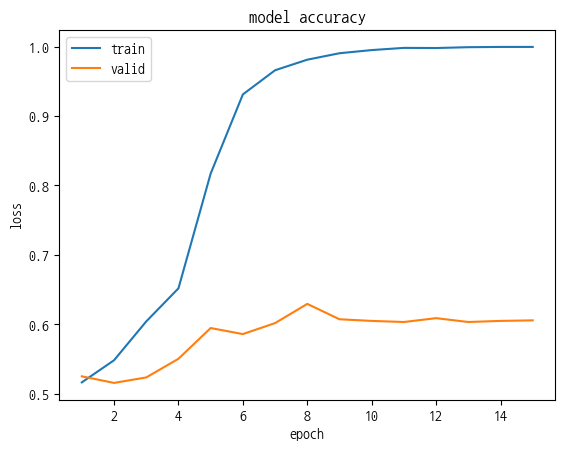

In [ ]:
# visualization
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], )
plt.show()

In [ ]:
# best model - evaluate
from tensorflow.keras.models import Sequential, load_model
best_model = load_model(checkpoint_path)
best_model.evaluate(x_test_pad, y_test)

40/40 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.5948


[0.6546868681907654, 0.5947867035865784]

In [ ]:
# model predict
predict = best_model.predict(output_pad)

32/32 [==============================] - 0s 2ms/step


In [ ]:
predictions = best_model.predict(output_pad)
output['YN'] = (np.round(predict)).astype(int)
output.head()

NameError: name 'best_model' is not defined

In [ ]:
output['YN'] = output['YN'].map(class2label)
output.head()

NameError: name 'output' is not defined

In [ ]:
output.to_csv('_2.csv', index=False)

import pickle

with open('_2.h5', 'wb') as f:
    pickle.dump(best_model, f)

<br>

<br>

<br>

<br>

<br>

# **start**
---

In [ ]:
os.listdir('03_multitab/')

NameError: name 'os' is not defined

In [ ]:
#check
main_dir = "03_multitab/"
train_dir = "train/"
on_dir = os.path.join(main_dir, train_dir, "on")
off_dir = os.path.join(main_dir, train_dir, "off")
test_dir = os.path.join(main_dir, "test")


In [ ]:
# data
from PIL import Image

class2idx = {'on':1, 'off':0}
idx2class = {0: 'off', 1:'on'}

X = []
y = []

for p in os.listdir(on_dir):
    img_array = Image.open(os.path.join(on_dir,p))
    new_img_array = img_array.resize((200, 200))
    new_img_array = np.array(new_img_array)/255.  # scaling
    X.append(new_img_array)
    y.append(1)

for p in os.listdir(off_dir):
    img_array = Image.open(os.path.join(off_dir,p))
    new_img_array = img_array.resize((200, 200))
    new_img_array = np.array(new_img_array)/255.  # scaling
    X.append(new_img_array)
    y.append(0)


X = np.array(X)
y = np.array(y)

In [ ]:
X.shape, y.shape

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpoint_path = ".h5"
mc = ModelCheckpoint(filepath=checkpoint_path,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

history=model.fit(X, y,
      epochs=20, batch_size=64, validation_split=0.3, callbacks=[es, mc])


NameError: name 'Sequential' is not defined

In [ ]:
# Visualization
history.history.keys()

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

NameError: name 'history' is not defined

In [ ]:
##
output = []
id_line = []

for p in os.listdir(test_dir):
    id_line.append(p)
    img_array = Image.open(os.path.join(test_dir,p))
    new_img_array = img_array.resize((200, 200))
    new_img_array = np.array(new_img_array)/255.  # scaling
    output.append(new_img_array)

output = np.array(output)

# predict
predictions = model.predict(output)
predicted_val = [int(round(p[0])) for p in predictions]


21/21 [==============================] - 0s 9ms/step


In [ ]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})
submission_df.to_csv(".csv", index=False)

In [7]:
# best model - evaluate
from tensorflow.keras.models import Sequential, load_model
best_model = load_model(checkpoint_path)

import pickle
with open('.h5', 'wb') as f:
    pickle.dump(best_model, f)

NameError: name 'checkpoint_path' is not defined

In [8]:
os.listdir()


NameError: name 'os' is not defined

In [ ]:

# Predict using Test data
i=1
plt.figure(figsize=(16, 8))
for img in X_test[:8]:
      # predict
      pred = model.predict(img.reshape(-1,80, 80, 3))
      print(pred)
      pred_t = int(np.round(pred)) #np.argmax(pred) # multi or binary
      print(pred_t)
      plt.subplot(2, 4, i)
      plt.title(f'Pred Value: {idx2class[pred_t]}')
      plt.imshow(img)
      plt.axis('off')
      i = i + 1

In [ ]:
os.listdir('')

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
df = pd.read_csv('.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      666 non-null    object
 1   label   666 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.5+ KB


In [ ]:
df.head()

,id,label
0,image_0_1031719061201.jpg,0
1,image_0_706913045238.jpg,0
2,image_0_205383569412.jpg,1
3,image_0_968376957310.jpg,1
4,image_0_89012780391.jpg,0
